In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Define a function to calculate the index
def index(i):
    """
    Calculate the step-value of the i-th Haar wavelet
    """
    j = int(np.ceil(np.log2(i))) - 1
    k = int(i - 2 ** j) - 1
    return j, k

In [4]:
# Define the Haar wavelet function
def haar(x, i):
    """
    x: the input value
    i: the index of the wavelet function
    
    return: the value of the wavelet function
    """
    if i == 1:
        if 0 <= x and x < 1:
            return 1
        else:
            return 0
    if i >= 2:
        j, k = index(i) # j is the scale, k is the translation
        m = 2 ** j
        alpha = k / m
        beta = (k + 0.5) / m
        gamma = (k + 1) / m
        if alpha <= x and x < beta:
            return 1
        elif beta <= x and x < gamma:
            return -1
        else:
            return 0

In [5]:
# define the Haar wavelet function for input is a vector
def haar_vec(x, i):
    """
    x: input vector
    i: the index of the Haar wavelet function

    return: the Haar wavelet function
    """
    if i == 1:
        return np.ones(len(x))
    if i >= 2:
        j, k = index(i) # j is the scale, k is the translation
        m = 2 ** j
        alpha = k / m
        beta = (k + 0.5) / m
        gamma = (k + 1) / m
        a = (x>=alpha) & (x<beta) 
        b = (x>=beta) & (x<=gamma)
        b = b.astype(int)
        a = a.astype(int)
        c = a - b
        return c

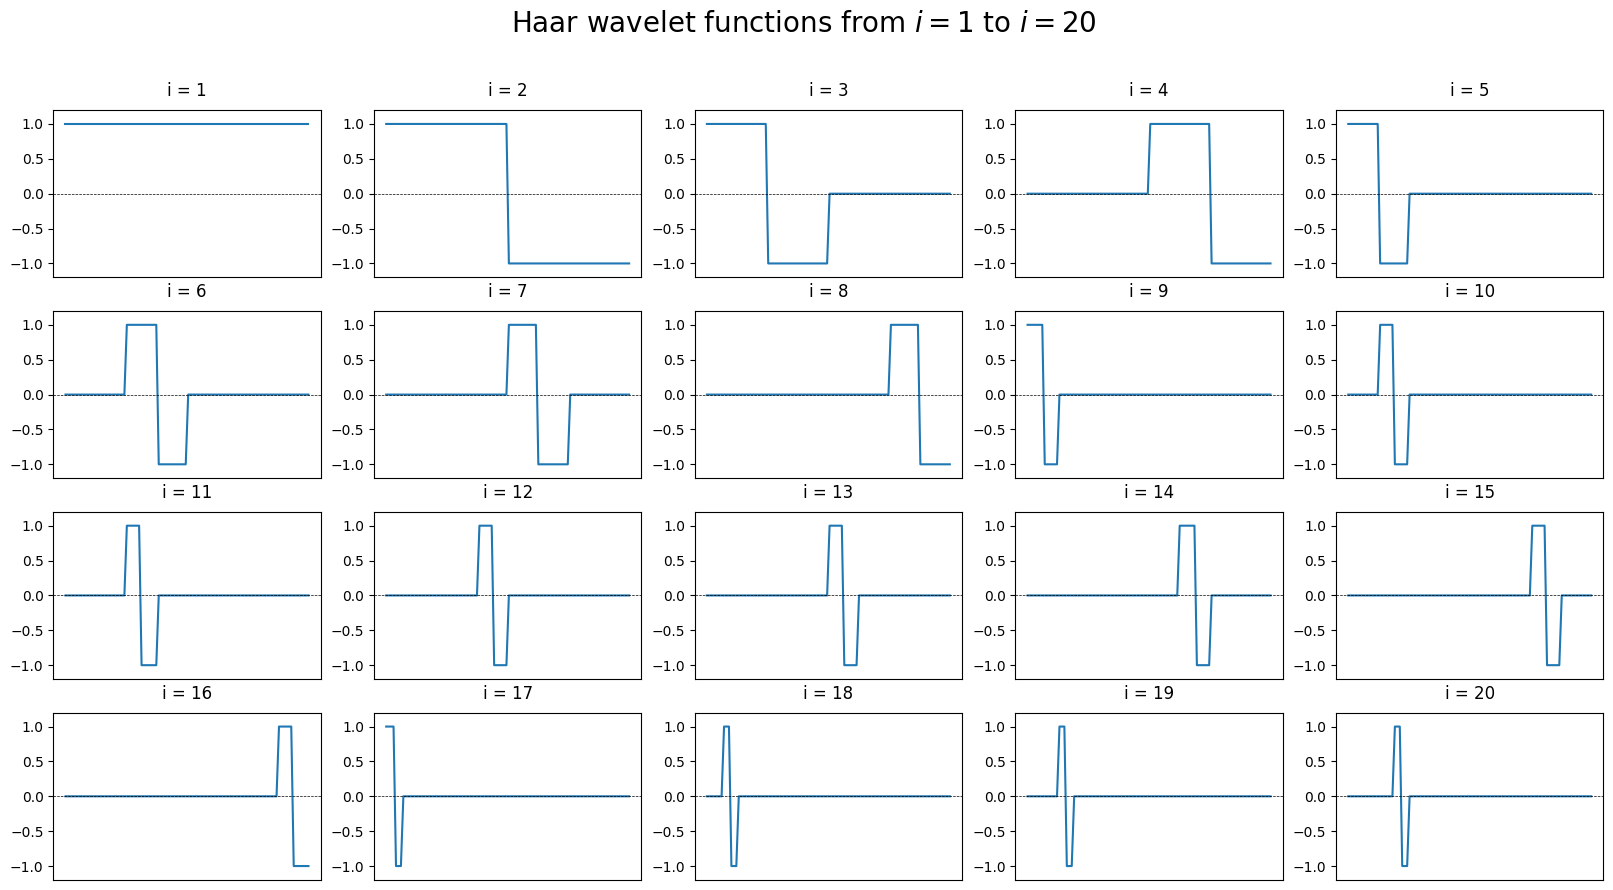

In [6]:
# plot the Haar wavelet function
fig, ax = plt.subplots(4, 5, figsize=(20, 10))
x = np.linspace(0, 1, 100)
for i in range(1, 21):
    ax[int((i - 1) / 5), (i - 1) % 5].plot(x, haar_vec(x, i))
    ax[int((i - 1) / 5), (i - 1) % 5].get_xaxis().set_visible(False) # make x-axis do not show
    ax[int((i - 1) / 5), (i - 1) % 5].set_title('i = ' + str(i), pad=10)
    ax[int((i - 1) / 5), (i - 1) % 5].set_ylim(-1.2, 1.2)
    ax[int((i - 1) / 5), (i - 1) % 5].axhline(y=0, color='k', linewidth=0.5, linestyle='--')
fig.suptitle('Haar wavelet functions from $i = 1$ to $i = 20$', fontsize=20)
plt.show()

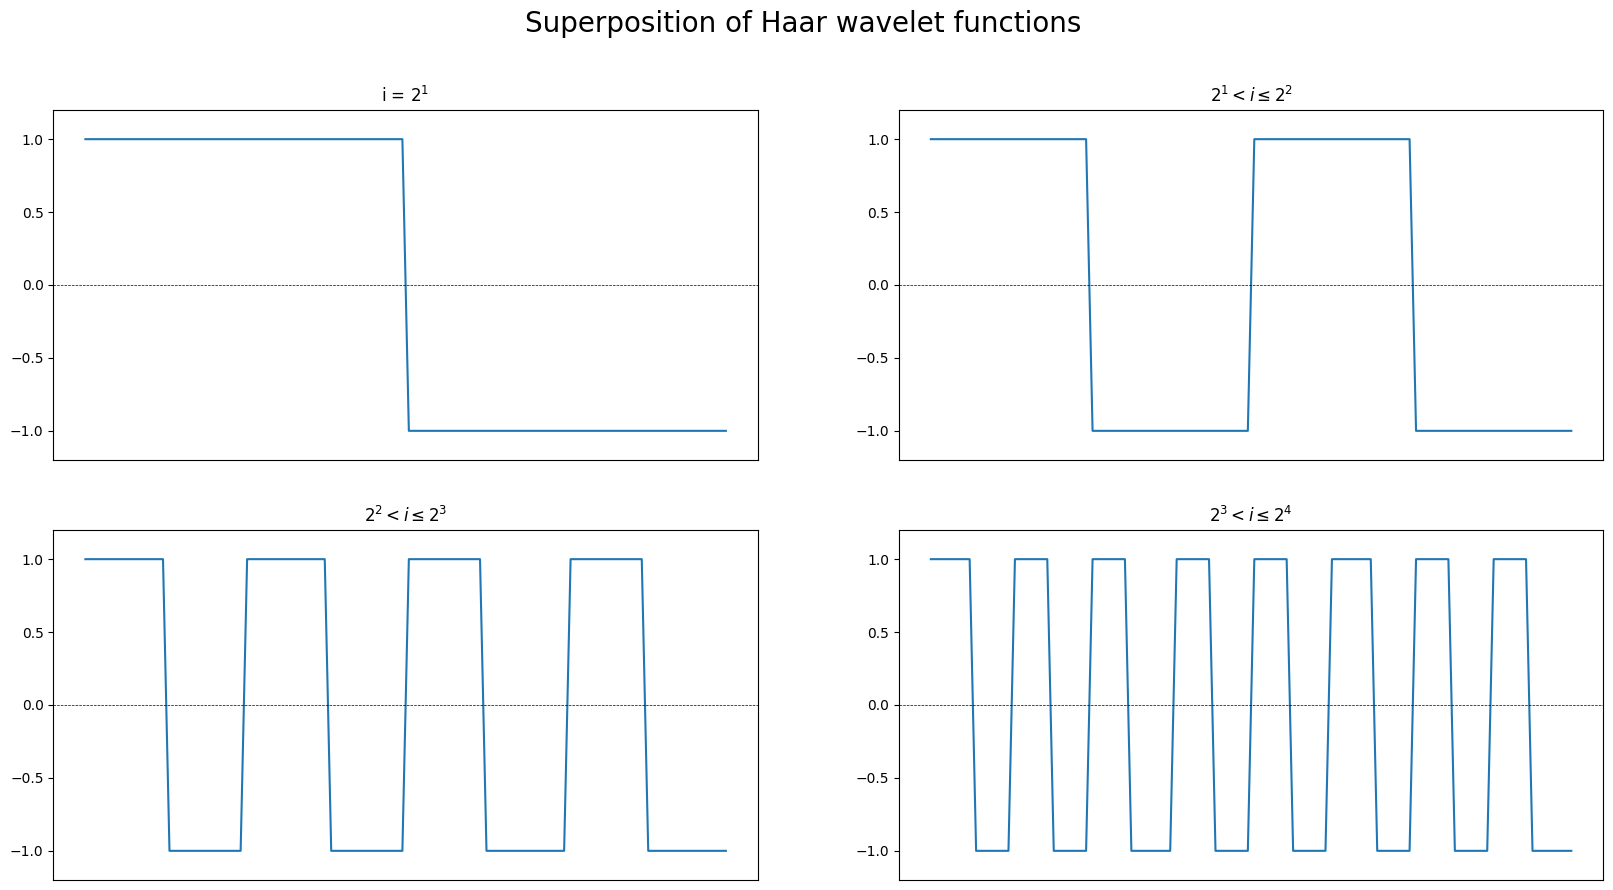

In [7]:
# plot the overlap of the Haar wavelet function
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
x = np.linspace(0, 1, 100)
ax[0, 0].plot(x, haar_vec(x, 2))
ax[0, 0].title.set_text('i = $2^{1}$')
ax[0, 0].set_ylim(-1.2, 1.2)
ax[0, 0].axhline(y=0, color='k', linewidth=0.5, linestyle='--')
ax[0, 0].get_xaxis().set_visible(False)

y = np.zeros(len(x))
for i in range(3, 5):
    y += haar_vec(x, i)
ax[0, 1].plot(x, y)
ax[0, 1].title.set_text('$2^{1} < i \leq 2^{2}$')
ax[0, 1].set_ylim(-1.2, 1.2)
ax[0, 1].axhline(y=0, color='k', linewidth=0.5, linestyle='--')
ax[0, 1].get_xaxis().set_visible(False)

y = np.zeros(len(x))
for i in range(5, 9):
    y += haar_vec(x, i)
ax[1, 0].plot(x, y)
ax[1, 0].title.set_text('$2^{2} < i \leq 2^{3}$')
ax[1, 0].set_ylim(-1.2, 1.2)
ax[1, 0].axhline(y=0, color='k', linewidth=0.5, linestyle='--')
ax[1, 0].get_xaxis().set_visible(False)

y = np.zeros(len(x))
for i in range(9, 17):
    y += haar_vec(x, i)
ax[1, 1].plot(x, y)
ax[1, 1].title.set_text('$2^{3} < i \leq 2^{4}$')
ax[1, 1].set_ylim(-1.2, 1.2)
ax[1, 1].axhline(y=0, color='k', linewidth=0.5, linestyle='--')
ax[1, 1].get_xaxis().set_visible(False)

fig.suptitle('Superposition of Haar wavelet functions', fontsize=20)
plt.show()

In [8]:
# define the function for first-order integration of the Haar wavelet function
def haar_int_1(x, i):
    """
    x: input vector
    i: the index of the Haar wavelet function

    return: the integration of the Haar wavelet function
    """
    if i == 1:
        return x
    if i >= 2:
        j, k = index(i) # j is the scale, k is the translation
        m = 2 ** j
        alpha = k / m
        beta = (k + 0.5) / m
        gamma = (k + 1) / m
        a = (x>=alpha) & (x<beta) 
        b = (x>=beta) & (x<=gamma)
        b = b.astype(int)
        a = a.astype(int)
        c = a * (x - alpha) + b * (x - gamma)
        return c

In [30]:
# define the function for the matrix of first-order integration of the haar wavelet function
def haar_int_1_mat(x, N):
    """
    x: input vector
    N: the number of order of the Haar wavelet function

    return: the matrix of the integration of the Haar wavelet function
    """
    mat = np.zeros((N, len(x)))
    for i in range(1, N + 1):
        mat[i - 1, :] = haar_int_1(x, i)
    return mat

In [10]:
# define the collocation points t = (k - 0.5) / N
def collocation(N=100):
    """
    N: the number of collocation points

    return: the collocation points
    """
    return np.linspace(0, 1, N, endpoint=False) + 0.5 / N

We want to get the $u(x)$ as $e^{x}$ when $f(x)=e^{x} + e^{-x}$ and $K(x,t) = e^{-(x+t)}$ for linear Fredholm Integral Equations
$$
u(x) = f(x) + \int^{1}_{0} K(x,t)u(t)dt
$$

In [11]:
import scipy.integrate as integrate
import numpy as np
x = np.random.uniform(0, 100)
def f (x):
    return np.exp(x) + np.exp(-x)

def K (x, t):
    return np.exp(-(x + t))

result = np.exp(x) - f(x) - integrate.quad(lambda t: K(x, t) * np.exp(t), 0, 1)[0]
print(result)

-3.1885786577907235e-38


In [53]:
N = 100
x = collocation(N)
t = collocation(N)

In [54]:
V_b = np.zeros(N)
S_1 = np.zeros(N)
S_2 = 0
for k in range(N):
    # note that here k+1 is the index of the Haar wavelet function, it should be i, but the same
    S_1 = 1/N * K(0, t[k]) * haar_int_1(t, k + 1)
    V_b = 1/N * K(x, t[k])
    S_2 += K(0, t[k]) 
V_b = 1 - V_b

In [55]:
B = f(x) - f(0) / (1 - S_2) * V_b # matrix B of linear system Ax = B

In [56]:
M_d = haar_int_1_mat(x, N)

M_e = np.outer(np.ones(N), S_1/ (1 - S_2))

M_f_r = np.zeros(N)
M_f_c = np.zeros(N)
for k in range(N):
    M_f_r= 1/N * K(x, t[k])
    M_f_c = (S_1/ (1 - S_2) - haar_int_1(t, k + 1))
M_f = np.outer(M_f_r, M_f_c)

In [57]:
A = M_d + M_e + M_f # matrix A of the linear system Ax = B

In [58]:
coef_haar = np.linalg.solve(A, B) # solve the linear system Ax = B

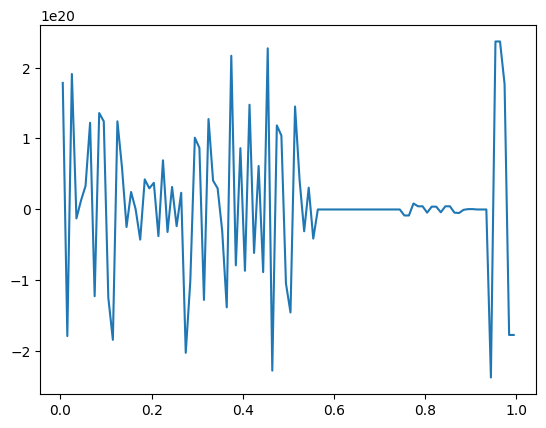

In [70]:
# form the result of the approximation
u_haar = np.zeros(N)
for k in range(N):
    u_haar += coef_haar[k] * haar_vec(x, k + 1)
plt.plot(x, u_haar, label='Haar wavelet approximation')